# Rotations of Ylm

The purpose of this document is to show how to rotate a spherical harmonic using Wigner D functions and Euler angles.

## Code

I use scipy to calculate spherical harmonics.
I use sympy to calculate Wigner D functions.  This is overkill.  Presumably there are faster numerical ways to calculate Wigner D matrices.

In [25]:
import matplotlib.pyplot as plt
from matplotlib import cm, colors # for plotting
from mpl_toolkits.mplot3d import Axes3D # for plotting
import numpy as np
from scipy.special import sph_harm
from sympy.physics.quantum.spin import Rotation
import matplotlib.image as mpimg

In [2]:
# Plot a linear combination of spherical harmonics
# Input: {(l1,m1):cof1 , (l2,m2):cof2 , ...}
def plotSph_harms(yset):
    
    phi = np.linspace(0, np.pi, 100)
    theta = np.linspace(0, 2*np.pi, 100)
    phi, theta = np.meshgrid(phi, theta)

    # The Cartesian coordinates of the unit sphere
    x = np.sin(phi) * np.cos(theta)
    y = np.sin(phi) * np.sin(theta)
    z = np.cos(phi)

    total = np.zeros(len(phi),dtype='complex')
    for key, cof in yset.items():
        l=key[0]
        m=key[1]
        total = total + sph_harm(m, l, theta, phi)*cof
    
    fcolors = total.real
    fmax, fmin = fcolors.max(), fcolors.min()
    print('min',fmin,'max',fmax)
    fcolors = (fcolors - fmin)/(fmax - fmin)

    # Set the aspect ratio to 1 so our sphere looks spherical
    fig = plt.figure(figsize=plt.figaspect(1.))
    ax = fig.add_subplot(111, projection='3d')
 
    ax.plot([0,0],[1,1.25],[0,0],'k')
    ax.plot([1,1.25],[0,0],[0,0],'b')
    ax.plot([0,0],[0,0],[1,1.25],'g')
    ax.plot_surface(x, y, z,  rstride=1, cstride=1, facecolors=cm.seismic(fcolors))
    ax.view_init(elev=30,azim=45)
    # Turn off the axis planes
    #ax.set_axis_off()
    plt.show()
    

In [3]:
# calculate wigner D matricies as a list of (2l+1)x(2l+1) arrays
def calc_wigner_D(alpha,beta,gamma,nlam=4):
    out = []
    for l in range(0,nlam):
        D = np.zeros((2*l+1,2*l+1),dtype='complex')
        for m in range(-l,l+1):
            for mp in range(-l,l+1):
                # note that I may use m and mp bacward from sympy docs
                D[mp-l,m-l]=Rotation.D(l,mp,m,alpha,beta,gamma).doit().evalf()
        out.append(D)
    return out

A note on index order:  I write $D^{m',m}$ where $m'$ is the z-component after rotation, while $m$ is the z component before rotation.

In [4]:
def rotate_multi_ylm(winDdata,yset):
    tol=10**-14
    out={}
    for key, cof in yset.items():
        l=key[0]
        m=key[1]
        for mp in range(-l,l+1):
            D=winDdata[l][mp-l,m-l]
            if abs(D)>tol:
                val = out.get((l,mp),0.0j)
                out[(l,mp)]=val+D*cof
    return out   

## Convention Demonstrated

I will describe an \textbf{active} rotation.  Note that the sympy package I use has documentation for a passive rotation; however I swap the m and mp in its input so I get active rotations.

I will use \textbf{z-y-z convention}.  That is, the rotation is first performed about the z axis by angle $\alpha$ to give the x'-y'-z' coordinate system.  Then the object is rotate about the y' axis by an angle $\beta$ to form the x''-y''-z'' axis.  Finally the system is rotate about an angle $\gamma$ about the z'' axis.

I illustrate this below by rotating a picture of $Y_3^2$.

In [5]:
yset={(3,2):1.0}

min -0.393349405215 max 0.393349405215


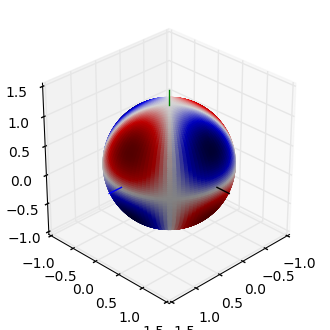

In [6]:
plotSph_harms(yset)

The above figure is a color map of the real part of $Y_3^2(\vec{u})$.  The x-y-z axis are colored blue-black-green respectively.

Next we rotate this figure by an angle $\alpha = \pi/6$ about its z axis.

In [7]:
alpha=np.pi/6.0; beta=0.0; gamma=0.0
data=calc_wigner_D(alpha,beta,gamma,nlam=4)

In [8]:
newyset = rotate_multi_ylm(data,yset)

min -0.393349405215 max 0.393349405215


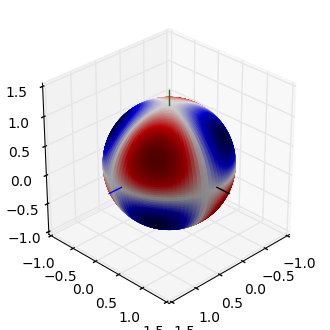

In [9]:
plotSph_harms(newyset)

The above picture shows 
$$
\mathrm{Re}[\sum_{m'} Y_3^{m'}(\vec{u})D_{3}^{m',2}(\pi/6,0,0)]
$$
that is, $Y_3^2$ rotated about the z axis by $30^o$.

Next we will rotate it by an angle $\beta=\pi/2$ about the new y' axis (not shown). 

min -0.393079669482 max 0.393079669482


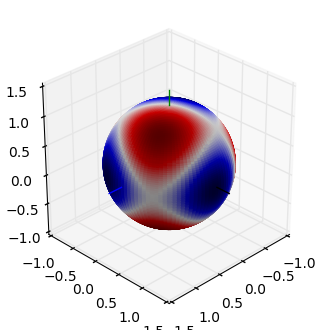

In [10]:
alpha=np.pi/6.0; beta=np.pi/2.0; gamma=0.0
data=calc_wigner_D(alpha,beta,gamma,nlam=4)
newyset = rotate_multi_ylm(data,yset)
plotSph_harms(newyset) 

min -0.393079669482 max 0.393079669482


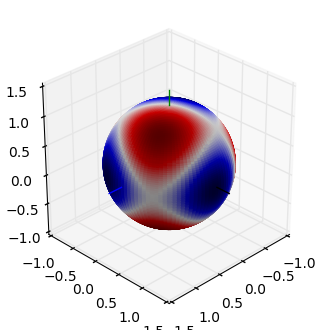

In [11]:
plotSph_harms(newyset)

The above picture shows 
$$
\mathrm{Re}[\sum_{m'} Y_3^{m'}(\vec{u})D_{3}^{m',2}(\pi/6,\pi/2,0)]
$$

Finally we rotate by an angle $\gamma=\pi/6$ about the new z'' axis (not shown).

min -0.393281417808 max 0.393281417808


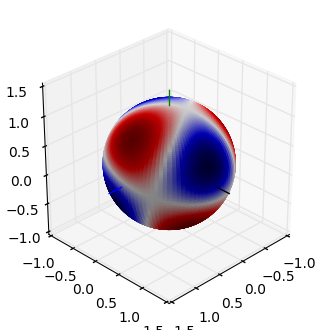

In [12]:
alpha=np.pi/6.0; beta=np.pi/2.0; gamma=np.pi/6.0
data=calc_wigner_D(alpha,beta,gamma,nlam=4)
newyset = rotate_multi_ylm(data,yset)
plotSph_harms(newyset) 

## Alternative Interpretation

There is another way to understand the way Euler rotations work.  This is not a different convention, but an equivalent explanation.  Rather than rotate about the new axis at each successive rotation we may rotate about a fixed set of coordinates but perform the rotations in the opposite order.

Keeping in mind that rotation are applied from the left, the folling identity holds:
$$
R_{z''}(\gamma)R_{y'}(\beta)R_z(\alpha)=R_z(\alpha)R_y(\beta)R_z(\gamma)
$$
see "Modern Quantum Mechanics" by Sakurai for proof.

We will illustrate this.  

min -0.393349405215 max 0.393349405215


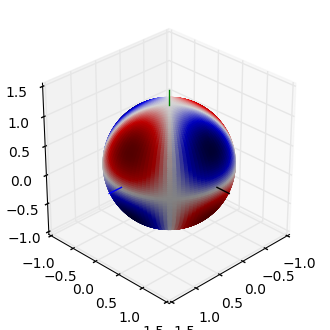

In [13]:
yset={(3,2):1.0}
plotSph_harms(yset)

The above shows $Y_3^2$

First perform $\gamma=\pi/6$ rotation about z.

min -0.393349405215 max 0.393349405215


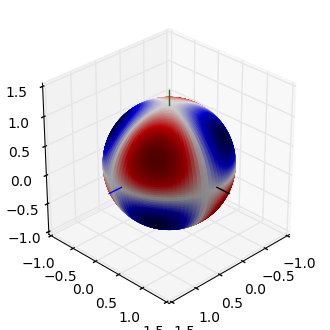

In [14]:
alpha=0; beta=0; gamma=np.pi/6.0
data=calc_wigner_D(alpha,beta,gamma,nlam=4)
newyset = rotate_multi_ylm(data,yset)
plotSph_harms(newyset) 

Then $\beta=\pi/2$ rotation about y.

min -0.393283651551 max 0.393070050177


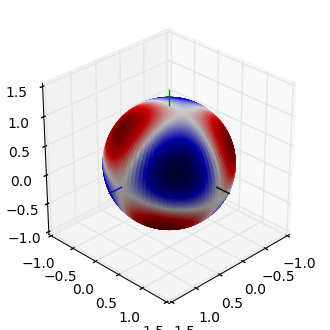

In [15]:
alpha=0; beta=np.pi/2.0; gamma=np.pi/6.0
data=calc_wigner_D(alpha,beta,gamma,nlam=4)
newyset = rotate_multi_ylm(data,yset)
plotSph_harms(newyset) 

Finally $\alpha$ rotation about z again.

min -0.393281417808 max 0.393281417808


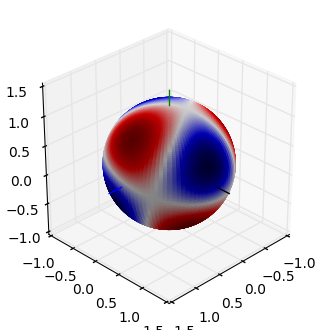

In [16]:
alpha=np.pi/6.0; beta=np.pi/2.0; gamma=np.pi/6.0
data=calc_wigner_D(alpha,beta,gamma,nlam=4)
newyset = rotate_multi_ylm(data,yset)
plotSph_harms(newyset) 

## Special Case of 4pt isotropic

min -0.74635266518 max 0.74635266518


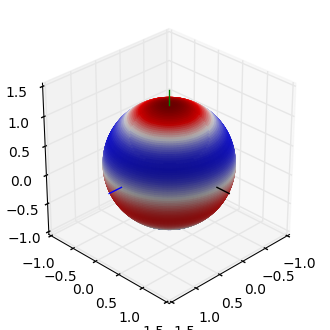

In [18]:
yset={(3,0):1.0}
plotSph_harms(yset)

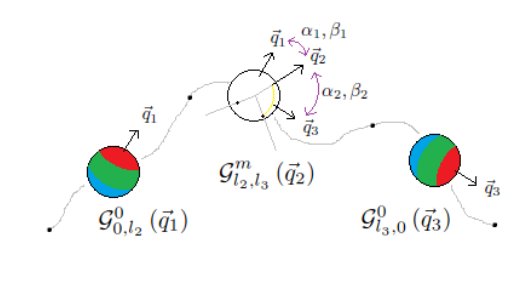

In [36]:
img = mpimg.imread('EulerAngleChain.png')
plt.imshow(img)
plt.axis('off')
plt.show()

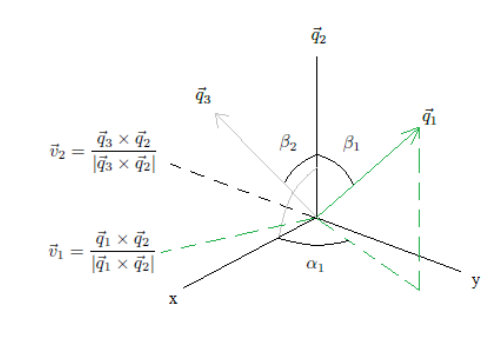

In [37]:
img = mpimg.imread('EulerAngleFromV.png')
plt.imshow(img)
plt.axis('off')
plt.show()